In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('Merged_IMDBTop400.xlsx.xlsx', sheet_name="Merged_IMDBTop400")
df.head()

,Genre,Movie Name,Year,Rating,Votes,Type,Detail/Main Story,Metascore
0,Adventure,1. Echo,2023?2024,6.1?(24K),"Votes23,699",TV Mini Series,"Maya Lopez must face her past, reconnect with ...",NaN
1,Adventure,2. Society of the Snow,2023,7.9?(64K),"Votes64,320",NaN,The flight of a rugby team crashes on a glacie...,72.0
2,Adventure,3. Percy Jackson and the Olympians,2023?,7.4?(18K),"Votes18,020",TV Series,Demigod Percy Jackson leads a quest across Ame...,NaN
3,Adventure,4. Game of Thrones,2011?2019,9.2?(2.2M),"Votes2,247,841",TV Series,Nine noble families fight for control over the...,NaN
4,Adventure,5. Napoleon,2023,6.5?(95K),"Votes95,398",NaN,An epic that details the checkered rise and fa...,64.0


In [5]:
#CLean the 'Year' column removing (?)
df['Year'] = df['Year'].astype(str).str.extract(r'(\d{4})').astype(float)


In [7]:
#Filtering for 2021-2025
df = df[(df['Year'] >= 2021) & (df['Year'] <= 2025)]

In [9]:
#Cleaning the Rating column, removing extra character '?'
df['Rating'] = df['Rating'].astype(str).str.extract(r'(\d+\.\d+)').astype(float)

In [11]:
#Cleaning Movie Name
df['Movie Name'] = df['Movie Name'].str.replace(r'^\d+\.\s*', '',regex=True)

In [13]:
#Data Exploration and Insight 
#Average Rating by Genre
genre_rating = df.groupby('Genre')['Rating'].mean().sort_values(ascending=False)
print(genre_rating)

Genre
Drama          7.378409
Fantasy        7.294167
Documentary    7.278537
Animation      7.241667
Biography      7.205000
History        7.112500
Adventure      7.016547
Crime          7.015909
Comedy         7.014474
Sci-Fi         6.907438
War            6.828049
Thriller       6.788024
Mystery        6.776978
Game-Show      6.751538
Romance        6.710577
Family         6.563529
Horror         6.260714
Name: Rating, dtype: float64


In [15]:
#Top Rated movies (2021-2025)
top_movies = df.sort_values(by='Rating', ascending=False)[['Movie Name', 'Genre', 'Year', 'Rating']].head(10)
print(top_movies)

                Movie Name      Genre    Year  Rating
3313     Baldur's Gate III    Fantasy  2023.0     9.7
163      Baldur's Gate III  Adventure  2023.0     9.7
3490  God of War: Ragnarok    Fantasy  2022.0     9.6
2538     Sapne Vs Everyone      Drama  2023.0     9.6
2899       Shrimad Ramayan     Family  2024.0     9.5
3432       Shrimad Ramayan    Fantasy  2024.0     9.5
4627          Alan Wake II     Horror  2023.0     9.4
3594          Spider-Man 2    Fantasy  2023.0     9.3
4673          Spider-Man 2     Horror  2023.0     9.3
3859     Jet Lag: The Game  Game-Show  2022.0     9.2


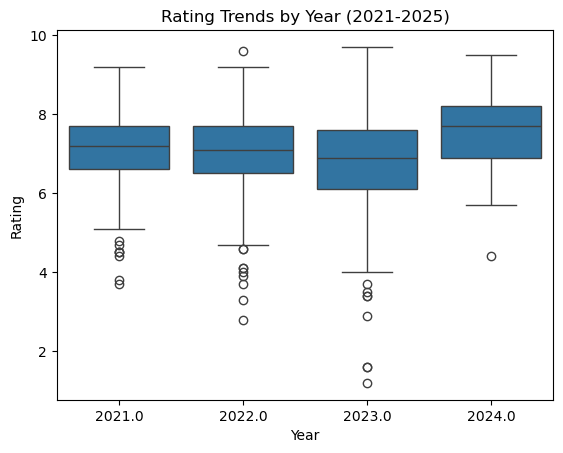

In [17]:
#Rating trend over years 
import seaborn as sns
import matplotlib.pyplot as plt 
sns.boxplot(x='Year', y='Rating', data=df)
plt.title("Rating Trends by Year (2021-2025)")
plt.show()

In [18]:
#Setting a clean styple for plots 
sns.set_style("whitegrid")
df_cleaned = df[(df['Year'] >= 2021) & (df['Year'] <=2025)]
df_cleaned = df_cleaned.dropna(subset=['Genre', 'Movie Name', 'Year', 'Rating'])

C:\Users\HP\AppData\Local\Temp\ipykernel_7556\495267644.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=movies_per_year, x='Year', y='Count', palette='pastel')


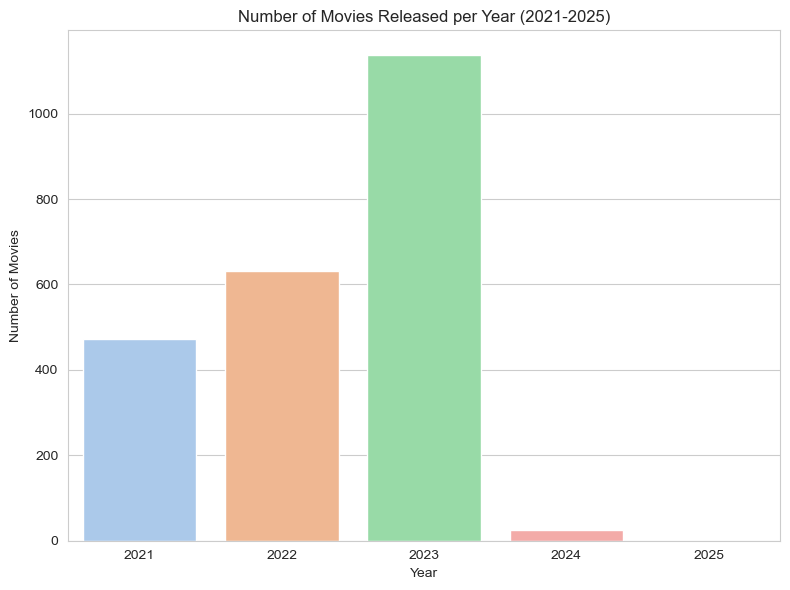

In [21]:
#Bar chart : Total Number of movies released per year (2021-2025)
movies_per_year = df_cleaned.groupby('Year').size().reindex(range(2021, 2026), fill_value=0).reset_index(name='Count')
plt.figure(figsize=(8, 6))
sns.barplot(data=movies_per_year, x='Year', y='Count', palette='pastel')
plt.title("Number of Movies Released per Year (2021-2025)")
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.tight_layout()
plt.show()

#Result: 2023 shows the highest numbers of movies released, showing a strong production year.

C:\Users\HP\AppData\Local\Temp\ipykernel_7556\1639761223.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_counts, y='Genre', x='Count', palette='coolwarm')


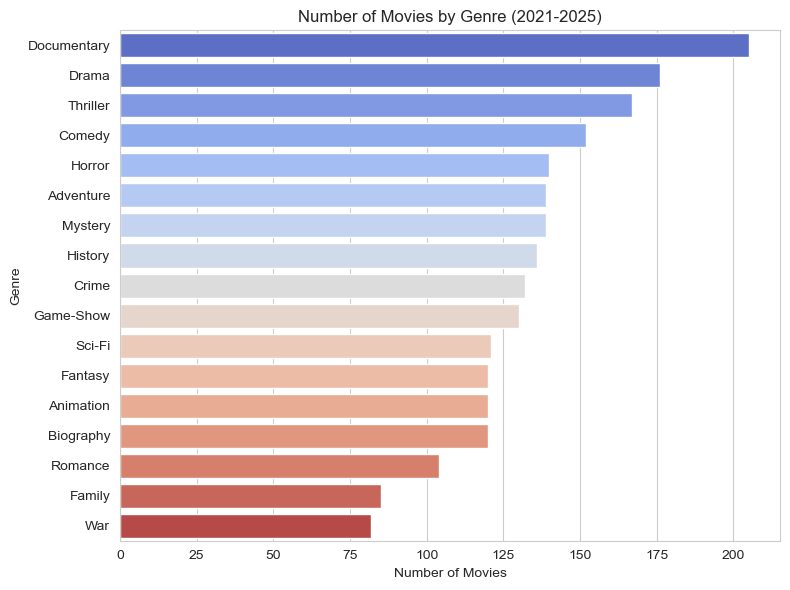

In [23]:
#Horizontal bar chart: Frequency of each genre
genre_counts = df_cleaned['Genre'].value_counts().reset_index()
genre_counts.columns =['Genre', 'Count']
plt.figure(figsize=(8, 6))
sns.barplot(data=genre_counts, y='Genre', x='Count', palette='coolwarm')
plt.title("Number of Movies by Genre (2021-2025)")
plt.xlabel("Number of Movies")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()

#Results: Genre frequency showing that ----- and ------ are th most frequent genres, indicating their popularity and demand

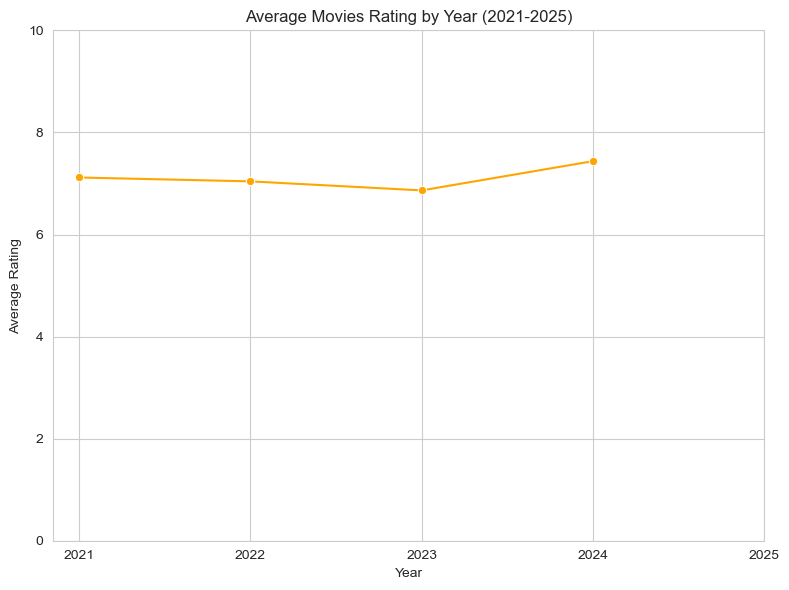

In [25]:
#Line chart: average movie rating by year 
avg_rating_per_year = df_cleaned.groupby('Year')['Rating'].mean().reset_index().sort_values('Year')
plt.figure(figsize=(8, 6))
sns.lineplot(data=avg_rating_per_year, x='Year', y='Rating', marker='o', color='orange')
plt.title("Average Movies Rating by Year (2021-2025)")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.ylim(0, 10)
plt.xticks(range(2021, 2026))
plt.tight_layout()
plt.show()

#Result: Average rating by year remained relatively stable, with a slight peaks suggesting standout years